In [1]:
from scipy.stats import bernoulli
def generate_movement(steps_num: int, probability: float) -> list:
    steps = [0] # fisrt step will be taken starting from 0 to left or right
    for _ in range(steps_num):
        # if bernoulli(p) = 0 => 2 * 0 - 1 = -1
        # else => 2 * 1 - 1 = 1
        steps.append(steps[-1] + 2 * bernoulli.rvs(probability) - 1)
    return steps

print(generate_movement(20, 0.55))

[0, 1, 0, -1, -2, -3, -2, -1, -2, -1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 2]


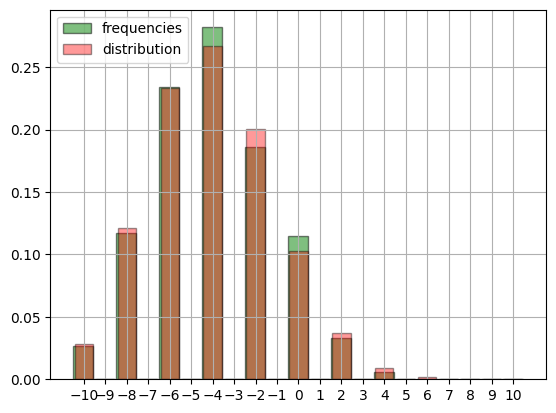

In [23]:
# 1000 tests and creating the histogram corresponding to the final positions of each test
# also theoretical probability of each number being the final position of a test of a 1000

from matplotlib.pyplot import grid, show, hist, bar, legend, xticks
from scipy.stats import binom

# frequencies of final positions for 1000 tests
n = 10
p = 0.3
data = [generate_movement(n, p)[-1] for _ in range(1000)]
bin_edges = [k + 0.5 for k in range(-n - 1, n + 1)]

hist(data, bin_edges, density=True, color='green', edgecolor='black', alpha=0.5, width=0.95, label='frequencies')

# probabilities
distribution = dict([(i, binom.pmf(k=(n+i)/2, n=n, p=p )) for i in range(-n, n + 1)])
bar(distribution.keys(), distribution.values(), color='red', edgecolor='black', alpha=0.4, width=0.85, label='distribution')

xticks([x for x in range(-10, 11)])
legend(loc='upper left')
grid()
show()

In [5]:
def generate_circle_movement(steps_num: int, probability: float, nodes: int) -> list:
    steps = [0] # fisrt step will be taken starting from 0 to left or right
    for _ in range(steps_num):
        # if bernoulli(p) = 0 => 2 * 0 - 1 = -1
        # else => 2 * 1 - 1 = 1
        steps.append((steps[-1] + 2 * bernoulli.rvs(probability) - 1) % nodes)
    return steps

print(generate_circle_movement(20, 0.70, 7))

[0, 1, 2, 3, 4, 5, 4, 5, 6, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 4, 5]


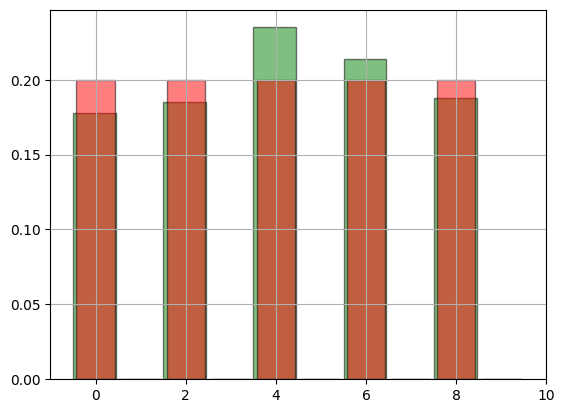

In [25]:
n = 100
p = 0.6
number_of_nodes = 10

data = [generate_circle_movement(n, p, number_of_nodes)[-1] for _ in range(1000)]
bin_edges = [k + 0.5 for k in range(-1, number_of_nodes)]

hist(data, bin_edges, density=True, color='green', edgecolor='black', alpha=0.5, width=0.95, label='frequency')

probabilities = [0] * number_of_nodes
for i in range(-n, n+1):
    probabilities[i % number_of_nodes] += binom.pmf(k=(n+i)/2, n=n, p=p)

distribution = dict([(i, probabilities[i]) for i in range(number_of_nodes)])
bar(distribution.keys(), distribution.values(), color='red', edgecolor='black', alpha=0.5, width=0.85, label='distribution')

grid()
show()

In [28]:
from scipy.stats import hypergeom, geom
# k = numarul pe care vrem sa il obtinem
# M = nr total obiecte
# n = numarul de obiecte de tipul pe care dorim sa il extragem
# N = numarul total de extrageri
def lotto():
    winsProbability = sum([hypergeom.pmf(k, 49, 6, 6) for k in [3, 4, 5, 6]])
    print(geom.rvs(winsProbability, size = 100))
    
lotto()

[  3   6   6  13  56 177   4  27  52 131   4  42  33 141 101  90  17 228
  80  62  89  24  25 157   7   9  59  97  56  17 144  17  34  77 108  19
  15  41 113  91  12  11   4   3  20  25  11  30  68  37  12 108  32  33
  48 213  63   4   4  39  39  33   9 125   1  16 112  13  53   4   9   2
 196  45 140   8  41   9  11  79  93  10   1   3  32  20   1 182 152 146
  63  50  10  30  47  40  35  52  10  66]


In [30]:
def estimated_probability():
    samples = 1000
    winsProbability = sum([hypergeom.pmf(k, 49, 6, 6) for k in [3, 4, 5, 6]])
    wins = geom.rvs(winsProbability, size = samples)
    return sum([win >= 10 for win in wins]) / samples
print(estimated_probability())

0.832


In [33]:
winsProbability_ = sum([hypergeom.pmf(k, 49, 6, 6) for k in [3, 4, 5, 6]])
# 1 - prob sa avem maxim 9 extrageri pana la succes
theoretical_win_after_9_probability = 1 - geom.cdf(9, p=winsProbability_)
print(theoretical_win_after_9_probability)

0.844238101245036
